<a href="https://www.kaggle.com/code/nainapandey96/beer-production?scriptVersionId=99855220" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

Objective: The Beer production dataset provides a time series data for monthly beer production in Australia, for the period Jan 1956 – Aug 1995.
Objective:
* Check for the stationarity of your data using Rolling Statistics and Dickey-Fuller test.
* If stationarity is present, remove it using differencing in Python.
* Perform ARIMA modeling in Python after obtaining ACF and PACF plots.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/beer-production/monthly-beer-production-in-austr.csv


In [2]:
!pip install statsmodels==0.12.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 30.1 MB/s eta 0:00:00
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.13.2
    Uninstalling statsmodels-0.13.2:
      Successfully uninstalled statsmodels-0.13.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tsfresh 0.19.0 requires statsmodels>=0.13, but you have statsmodels 0.12.2 which is incompatible.


In [3]:
df_beer=pd.read_csv("/kaggle/input/beer-production/monthly-beer-production-in-austr.csv")
df_beer

,Month,Monthly beer production in Australia
0,1956-01,93.2
1,1956-02,96.0
2,1956-03,95.2
3,1956-04,77.1
4,1956-05,70.9
...,...,...
471,1995-04,127.0
472,1995-05,151.0
473,1995-06,130.0
474,1995-07,119.0


In [4]:
from datetime import datetime as dt
df_beer['Month']= df_beer['Month'].apply(lambda x: dt(int(x[:4]), int(x[5:]), 15))
df_beer

,Month,Monthly beer production in Australia
0,1956-01-15,93.2
1,1956-02-15,96.0
2,1956-03-15,95.2
3,1956-04-15,77.1
4,1956-05-15,70.9
...,...,...
471,1995-04-15,127.0
472,1995-05-15,151.0
473,1995-06-15,130.0
474,1995-07-15,119.0


So we got basic information about our data.

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller, acf, pacf
import math
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [6]:
df_beer.describe()

,Monthly beer production in Australia
count,476.000000
mean,136.395378
std,33.738725
min,64.800000
25%,112.900000
50%,139.150000
75%,158.825000
max,217.800000


In [7]:
df_beer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476 entries, 0 to 475
Data columns (total 2 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   Month                                 476 non-null    datetime64[ns]
 1   Monthly beer production in Australia  476 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 7.6 KB


<AxesSubplot:xlabel='Monthly beer production in Australia', ylabel='Count'>

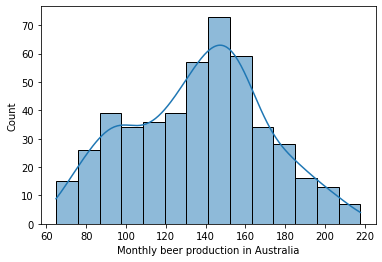

In [8]:
sns.histplot(df_beer['Monthly beer production in Australia'], kde=True)

<AxesSubplot:>

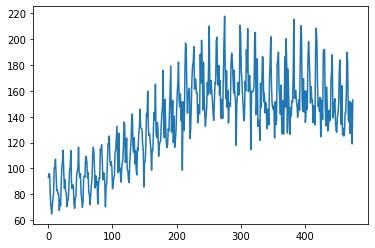

In [9]:
ts=df_beer['Monthly beer production in Australia']
ts.plot()

In [10]:
def check_station(timeseries):
    #determing rolling mean
    rolmean=timeseries.rolling(window=42, center=False).mean()
    rolstd=timeseries.rolling(window=42, center=False).std()
    #Plot rolling statistics
    orignal= plt.plot(timeseries, color='blue', label='Original')
    mean=plt.plot(rolmean,color='red',label='Rolling mean')
    std=plt.plot(rolstd,color='black',label='Rolling standard deviation')
    plt.legend(loc='best')
    plt.title('Rolling Meanand Standard Deviation')
    plt.show(block=False)
    #Now we will check for dickey fuller test
    print('Results of Dickey Fuller Test:')
    dftest=adfuller(timeseries, autolag='AIC')
    dfoutput= pd.Series(dftest[0:4], index=['Test Statistic', 'p-value','#Lags Used','No of observations used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' %key]=value
    print(dfoutput)


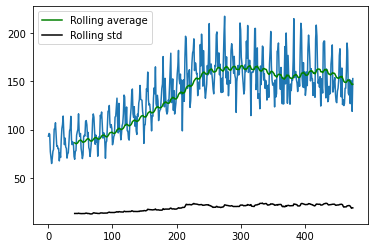

In [11]:
moving_average= ts.rolling(window=42).mean()
moving_std=ts.rolling(window=42).std()
plt.plot(ts)
plt.plot(moving_average, color='green', label='Rolling average')
plt.plot(moving_std, color='Black', label='Rolling std')
plt.legend(loc='best')
plt.show()

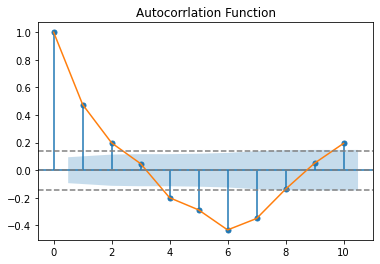

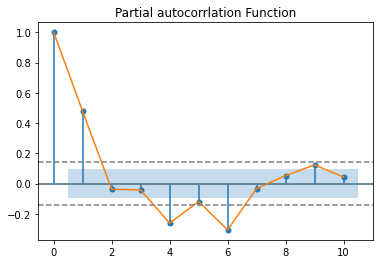

In [12]:
ts_diff= ts-moving_average
ts_diff.dropna(inplace=True)
ts_diff.head()
#We will obtain ACF and PACF
import statsmodels.api as sm
#ACF
sm.graphics.tsa.plot_acf(ts_diff.values.squeeze(), lags=10)
plt.plot(np.arange(0,11),acf(ts_diff, nlags=10)) #arange() function is used to get evenly spaced values within a given interval
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-2.96/np.sqrt(len(ts_diff)), linestyle='--', color='gray')
plt.axhline(y=2.96/np.sqrt(len(ts_diff)), linestyle='--', color='gray')
plt.title('Autocorrlation Function')
plt.show()

#PACF
sm.graphics.tsa.plot_pacf(ts_diff.values.squeeze(), lags=10)
plt.plot(np.arange(0,11), pacf(ts_diff, nlags=10)) 
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-2.96/np.sqrt(len(ts_diff)), linestyle='--', color='gray')
plt.axhline(y=2.96/np.sqrt(len(ts_diff)), linestyle='--', color='gray')
plt.title('Partial autocorrlation Function')
plt.show()


**ACF** curve crosses the upper confidence value after 6 lags. Thus, optimal value of q in the ARIMA model must be between 1 to 6.

**PACF** curve drops to 0 between lag values 1 and 2. Thus, optimal value of p in the ARIMA model is 1 or 2.

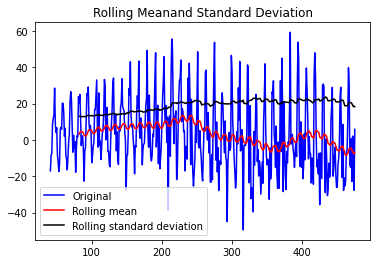

Results of Dickey Fuller Test:
Test Statistic              -1.608242
p-value                      0.479452
#Lags Used                  17.000000
No of observations used    417.000000
Critical Value (1%)         -3.446129
Critical Value (5%)         -2.868496
Critical Value (10%)        -2.570475
dtype: float64


In [13]:
check_station(ts_diff)

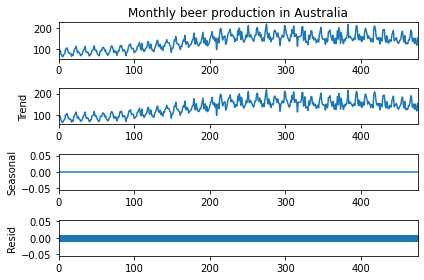

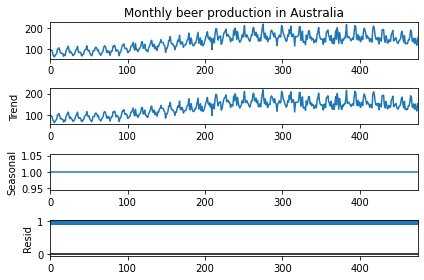

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose
addi= seasonal_decompose(ts, model='additive', period=1)
results_multi= seasonal_decompose(ts, model='multiplicative', period=1)
addi.plot()
results_multi.plot()
plt.show()

In [15]:
#We will use trend from the additive model
trend= addi.trend

## Different time series 

We will use RMSE and MAPE to check the performance of our models but before that we need to understand what is RMSE and MAPE.

**MAPE( Mean Absolute Percentage Error)** 
 
Mean absolute percentage error is used to check the accuracy of the forecast system. It measures this accuracy as a percentage, and can be calculated as the average absolute percent error for each time period minus actual values divided by actual values. It is modtly used probably because the variable’s units are scaled to percentage units, which makes it easier to understand. It works best if there are no extremes to the data (and no zeros). It is often used as a loss function in regression analysis and model evaluation.

![](http://www.statisticshowto.com/wp-content/uploads/2017/09/mape.jpeg)

Where:

*  n is the number of fitted points,
*  At is the actual value,
*  Ft is the forecast value.
*  Σ is summation notation (the absolute value is summed for every forecasted point in time).

Percentage errors are calculated in terms of absolute errors, without regards to sign. This avoids the problem of positive and negative errors canceling each other out. Obviously the lower the value for MAPE the better, but there is no specific value that you can call “good” or “bad.” For example if MAPE is 8% that means there is 8% average difference in forecasted value and actual value.

**RMSE(Root Mean Squared Error)**

rmse tells us the average distance between the predicted values from the model and the actual values in the dataset. 

RMSE = √Σ(Pi – Oi)2 / n

where:

* Σ is a fancy symbol that means “sum”
* Pi is the predicted value for the ith observation in the dataset
* Oi is the observed value for the ith observation in the dataset
* n is the sample size

The lower the RMSE, the better a given model is able to “fit” a dataset. However, the range of the dataset you’re working with is important in determining whether or not a given RMSE value is “low” or not. Now different data can have different range so we will use normalized RMSE so its value will come within 0 and 1 which will make it easier for us to determine if model is fitting better or not.

Normalized RMSE = RMSE / (max value – min value)

## Models

1. **Autoregression (AR)**
The autoregression (AR) method models the next step in the sequence as a linear function of the observations at prior time steps.

The notation for the model involves specifying the order of the model p as a parameter to the AR function, e.g. AR(p). For example, AR(1) is a first-order autoregression model.

The method is suitable for univariate time series without trend and seasonal components

Our time series doesnt have any seasonality but it does have a trend. Lets see how it works.


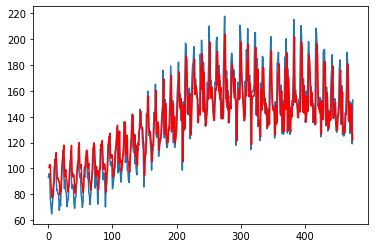

In [16]:
from statsmodels.tsa.ar_model import AutoReg
# fit model
model = AutoReg(trend, lags=1)
model_fit = model.fit()
plt.plot(ts)
plt.plot(model_fit.fittedvalues, color='Red')

In [17]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(trend[1:], model_fit.fittedvalues)).round(2)
norm_rmse= rmse/(217.80-64.80)
mape = np.round(np.mean(np.abs(trend[1:]- model_fit.fittedvalues)/trend[1:])*100,2)

results = pd.DataFrame({'Method':['Autoregression(AR)'], 'MAPE': [mape], 'Normalised RMSE': [norm_rmse]})
results = results[['Method', 'Normalised RMSE', 'MAPE']]
results

,Method,Normalised RMSE,MAPE
0,Autoregression(AR),0.12268,10.85


## Moving Average (MA)

The moving average (MA) method models the next step in the sequence as a linear function of the residual errors from a mean process at prior time steps.

A moving average model is different from calculating the moving average of the time series.

The notation for the model involves specifying the order of the model q as a parameter to the MA function, e.g. MA(q). For example, MA(1) is a first-order moving average model.

The method is suitable for univariate time series without trend and seasonal components.

We can use the ARIMA class to create an MA model and setting a zeroth-order AR model. We must specify the order of the MA model in the order argument.

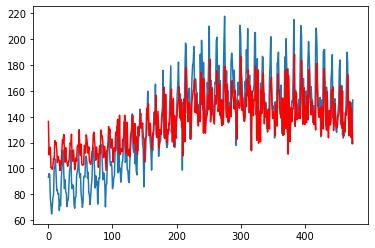

In [18]:
from statsmodels.tsa.arima_model import ARIMA
# fit model
arima = ARIMA(trend, order=(0,0,2))
arima_fit = arima.fit(disp=0)
plt.plot(ts)
plt.plot(arima_fit.fittedvalues, color='Red')

In [19]:
rmse_ar = np.sqrt(mean_squared_error(trend, arima_fit.fittedvalues)).round(2)
norm_rmse= (rmse_ar/(217.80-64.80)).round(4)
mape_ar = np.round(np.mean(np.abs(trend- arima_fit.fittedvalues)/trend)*100,2)
temp = pd.DataFrame({'Method':['Moving Average(MA)'], 'Normalised RMSE': [norm_rmse],'MAPE': [mape_ar] })
results = results.append(temp, ignore_index = True)
results

,Method,Normalised RMSE,MAPE
0,Autoregression(AR),0.12268,10.85
1,Moving Average(MA),0.14650,14.45


## Autoregressive Moving Average (ARMA)

The Autoregressive Moving Average (ARMA) method models the next step in the sequence as a linear function of the observations and residual errors at prior time steps.

It combines both Autoregression (AR) and Moving Average (MA) models.

The notation for the model involves specifying the order for the AR(p) and MA(q) models as parameters to an ARMA function, e.g. ARMA(p, q). An ARIMA model can be used to develop AR or MA models.

The method is suitable for univariate time series without trend and seasonal components.

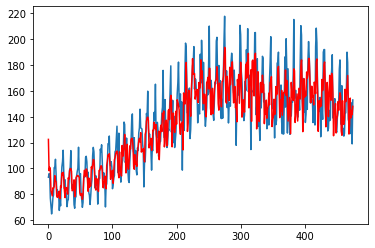

In [20]:
arma=ARIMA(trend, order=(1,0,6))
arma_fit= arma.fit(disp=0)
plt.plot(ts)
plt.plot(arma_fit.fittedvalues, color='Red')

In [21]:
rmse_ar = np.sqrt(mean_squared_error(trend, arma_fit.fittedvalues)).round(2)
norm_rmse= (rmse_ar/(217.80-64.80)).round(4)
mape_ar = np.round(np.mean(np.abs(trend- arma_fit.fittedvalues)/trend)*100,2)
temp = pd.DataFrame({'Method':['Autoregression Moving Average(ARMA)'], 'Normalised RMSE': [norm_rmse],'MAPE': [mape_ar] })
results = results.append(temp, ignore_index = True)
results

,Method,Normalised RMSE,MAPE
0,Autoregression(AR),0.12268,10.85
1,Moving Average(MA),0.14650,14.45
2,Autoregression Moving Average(ARMA),0.10640,9.58


## Autoregressive Integrated Moving Average (ARIMA)

The Autoregressive Integrated Moving Average (ARIMA) method models the next step in the sequence as a linear function of the differenced observations and residual errors at prior time steps.

It combines both Autoregression (AR) and Moving Average (MA) models as well as a differencing pre-processing step of the sequence to make the sequence stationary, called integration (I).

The notation for the model involves specifying the order for the AR(p), I(d), and MA(q) models as parameters to an ARIMA function, e.g. ARIMA(p, d, q). An ARIMA model can also be used to develop AR, MA, and ARMA models.

The method is suitable for univariate time series with trend and without seasonal components.

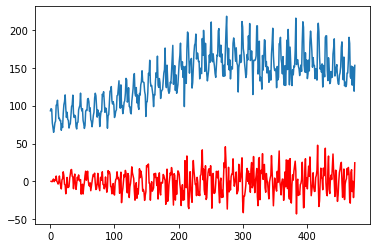

In [22]:
ari= ARIMA(trend, order=(2,1,6))
ari_fit=ari.fit(disp=0)
plt.plot(ts)
plt.plot(ari_fit.fittedvalues, color='Red')

In [23]:
rmse_ar = np.sqrt(mean_squared_error(trend[1:], ari_fit.fittedvalues)).round(2)
norm_rmse= (rmse_ar/(217.80-64.80)).round(4)
mape_ar = np.round(np.mean(np.abs(trend[1:]- ari_fit.fittedvalues)/trend[1:])*100,2)
temp = pd.DataFrame({'Method':['Autoregression Integrated Moving Average(ARIMA)'], 'Normalised RMSE': [norm_rmse],'MAPE': [mape_ar] })
results = results.append(temp, ignore_index = True)
results

,Method,Normalised RMSE,MAPE
0,Autoregression(AR),0.12268,10.85
1,Moving Average(MA),0.14650,14.45
2,Autoregression Moving Average(ARMA),0.10640,9.58
3,Autoregression Integrated Moving Average(ARIMA),0.92020,100.31


## Seasonal Autoregressive Integrated Moving-Average (SARIMA)

The Seasonal Autoregressive Integrated Moving Average (SARIMA) method models the next step in the sequence as a linear function of the differenced observations, errors, differenced seasonal observations, and seasonal errors at prior time steps.

It combines the ARIMA model with the ability to perform the same autoregression, differencing, and moving average modeling at the seasonal level.

The notation for the model involves specifying the order for the AR(p), I(d), and MA(q) models as parameters to an ARIMA function and AR(P), I(D), MA(Q) and m parameters at the seasonal level, e.g. SARIMA(p, d, q)(P, D, Q)m where “m” is the number of time steps in each season (the seasonal period). A SARIMA model can be used to develop AR, MA, ARMA and ARIMA models.

The method is suitable for univariate time series with trend and/or seasonal components.

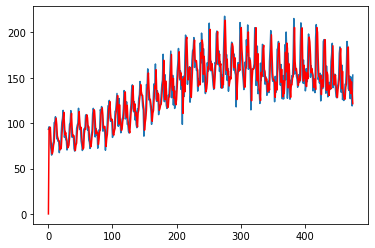

In [24]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
sarima = SARIMAX(trend, order=(1,1,0), seasonal_order=(0, 0, 0, 0))
sarima_fit = sarima.fit(disp=0)
plt.plot(ts)
plt.plot(sarima_fit.fittedvalues, color='Red')

In [25]:
rmse_ar = np.sqrt(mean_squared_error(trend, sarima_fit.fittedvalues)).round(2)
norm_rmse= (rmse_ar/(217.80-64.80)).round(4)
mape_ar = np.round(np.mean(np.abs(trend- sarima_fit.fittedvalues)/trend)*100,2)
temp = pd.DataFrame({'Method':['Seasonal Autoregressive Integrated Moving-Average (SARIMA)'], 'Normalised RMSE': [norm_rmse],'MAPE': [mape_ar] })
results = results.append(temp, ignore_index = True)
results

,Method,Normalised RMSE,MAPE
0,Autoregression(AR),0.12268,10.85
1,Moving Average(MA),0.14650,14.45
2,Autoregression Moving Average(ARMA),0.10640,9.58
3,Autoregression Integrated Moving Average(ARIMA),0.92020,100.31
4,Seasonal Autoregressive Integrated Moving-Aver...,0.12790,11.05


## Seasonal Autoregressive Integrated Moving-Average with Exogenous Regressors (SARIMAX)

The Seasonal Autoregressive Integrated Moving-Average with Exogenous Regressors (SARIMAX) is an extension of the SARIMA model that also includes the modeling of exogenous variables.

Exogenous variables are also called covariates and can be thought of as parallel input sequences that have observations at the same time steps as the original series. The primary series may be referred to as endogenous data to contrast it from the exogenous sequence(s). The observations for exogenous variables are included in the model directly at each time step and are not modeled in the same way as the primary endogenous sequence (e.g. as an AR, MA, etc. process).

The SARIMAX method can also be used to model the subsumed models with exogenous variables, such as ARX, MAX, ARMAX, and ARIMAX.

The method is suitable for univariate time series with trend and/or seasonal components and exogenous variables.

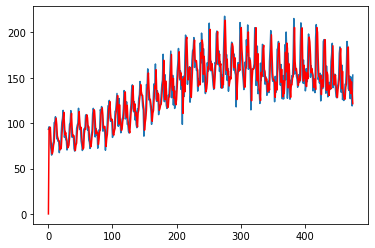

In [26]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
smax = SARIMAX(trend, exog=addi.seasonal, order=(2, 1, 6), seasonal_order=(0, 0, 0, 0))
smax_fit = smax.fit(disp=False)
plt.plot(ts)
plt.plot(sarima_fit.fittedvalues, color='Red')

In [27]:
rmse_ar = np.sqrt(mean_squared_error(trend, smax_fit.fittedvalues)).round(2)
norm_rmse= (rmse_ar/(217.80-64.80)).round(4)
mape_ar = np.round(np.mean(np.abs(trend- smax_fit.fittedvalues)/trend)*100,2)
temp = pd.DataFrame({'Method':['SARIMAX'], 'Normalised RMSE': [norm_rmse],'MAPE': [mape_ar] })
results = results.append(temp, ignore_index = True)
results

,Method,Normalised RMSE,MAPE
0,Autoregression(AR),0.12268,10.85
1,Moving Average(MA),0.14650,14.45
2,Autoregression Moving Average(ARMA),0.10640,9.58
3,Autoregression Integrated Moving Average(ARIMA),0.92020,100.31
4,Seasonal Autoregressive Integrated Moving-Aver...,0.12790,11.05
5,SARIMAX,0.10800,9.32


## Simple Exponential Smoothing (SES)

The Simple Exponential Smoothing (SES) method models the next time step as an exponentially weighted linear function of observations at prior time steps.

The method is suitable for univariate time series without trend and seasonal components.


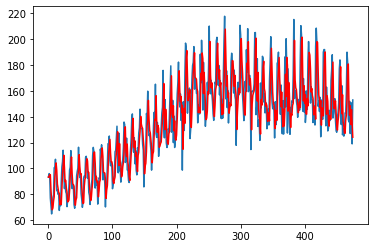

In [28]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
ses=SimpleExpSmoothing(trend)
ses_fit=ses.fit()
plt.plot(ts)
plt.plot(ses_fit.fittedvalues, color='Red')

In [29]:
rmse_ar = np.sqrt(mean_squared_error(trend, ses_fit.fittedvalues)).round(2)
norm_rmse= (rmse_ar/(217.80-64.80)).round(4)
mape_ar = np.round(np.mean(np.abs(trend- ses_fit.fittedvalues)/trend)*100,2)
temp = pd.DataFrame({'Method':['Simple Exponential Smoothing (SES)'], 'Normalised RMSE': [norm_rmse],'MAPE': [mape_ar] })
results = results.append(temp, ignore_index = True)
results

,Method,Normalised RMSE,MAPE
0,Autoregression(AR),0.12268,10.85
1,Moving Average(MA),0.14650,14.45
2,Autoregression Moving Average(ARMA),0.10640,9.58
3,Autoregression Integrated Moving Average(ARIMA),0.92020,100.31
4,Seasonal Autoregressive Integrated Moving-Aver...,0.12790,11.05
5,SARIMAX,0.10800,9.32
6,Simple Exponential Smoothing (SES),0.12350,10.91


## Holt Winter’s Exponential Smoothing (HWES)

The Holt Winter’s Exponential Smoothing (HWES) also called the Triple Exponential Smoothing method models the next time step as an exponentially weighted linear function of observations at prior time steps, taking trends and seasonality into account.

The method is suitable for univariate time series with trend and/or seasonal components.

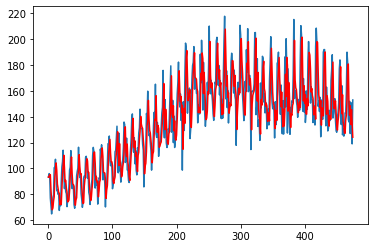

In [30]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
exsm= ExponentialSmoothing(trend)
exsm_fit= exsm.fit()
plt.plot(ts)
plt.plot(exsm_fit.fittedvalues, color='Red')

In [31]:
rmse_ar = np.sqrt(mean_squared_error(trend, exsm_fit.fittedvalues)).round(2)
norm_rmse= (rmse_ar/(217.80-64.80)).round(4)
mape_ar = np.round(np.mean(np.abs(trend- exsm_fit.fittedvalues)/trend)*100,2)
temp = pd.DataFrame({'Method':[' Exponential Smoothing (Holtwinters)'], 'Normalised RMSE': [norm_rmse],'MAPE': [mape_ar] })
results = results.append(temp, ignore_index = True)
results

,Method,Normalised RMSE,MAPE
0,Autoregression(AR),0.12268,10.85
1,Moving Average(MA),0.14650,14.45
2,Autoregression Moving Average(ARMA),0.10640,9.58
3,Autoregression Integrated Moving Average(ARIMA),0.92020,100.31
4,Seasonal Autoregressive Integrated Moving-Aver...,0.12790,11.05
5,SARIMAX,0.10800,9.32
6,Simple Exponential Smoothing (SES),0.12350,10.91
7,Exponential Smoothing (Holtwinters),0.12350,10.91


In [32]:
results.drop(results.tail(1).index, inplace=True)

In [33]:
results

,Method,Normalised RMSE,MAPE
0,Autoregression(AR),0.12268,10.85
1,Moving Average(MA),0.14650,14.45
2,Autoregression Moving Average(ARMA),0.10640,9.58
3,Autoregression Integrated Moving Average(ARIMA),0.92020,100.31
4,Seasonal Autoregressive Integrated Moving-Aver...,0.12790,11.05
5,SARIMAX,0.10800,9.32
6,Simple Exponential Smoothing (SES),0.12350,10.91


We can see that SARIMAX is giving us the most close result with order p=2, d=1,q=6. For multivariate time series, we have vector autoregression and its variants. We can also forecast data using predict after fitting the model. In my next project we will try to predict the prices of zinc. I hope this notebook is helpful to understand the different types of univariate models. 

if you like this notebook please upvote

Follow me on [@nancypandey](https://www.linkedin.com/in/nancy-pandey-08595987/)


Happy coding !!